### Homework 2
#### Jennifer Vo 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

##### Part 1

A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

The probability of rolling snake eyes (two ones) is 1/6 * 1/6 = 1/36 = 0.02778.
There are 36 possible dice combinations of 2 six-sided dice, and 6 ways to roll seven (6 + 1, 5 + 2, 4 + 3, 3 + 4, 2 + 5, 1 + 6). The probability of rolling sevens (dice sum to seven) is thus 6/36 = 1/6 = 0.1667

The ratio of the probabilities is (1/36) / (1/6) = 1/6 or 0.1667.

#### Part 2
Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).

The convolution operator is $P_{A+B}(x) = \sum_{z}P_A(z)P_B(x-z)$

##### Analytically (math & counting):

$P(2) = P(1)*P(1) = 1/36$

$P(3) = P(2)*P(1) + P(1)*P(2) = 2/36$

$P(4) = P(3)*P(1) + P(2)*P(2) + P(1)*P(3) = 3/36$

$P(5) = P(4)*P(1) + P(3)*P(2) + P(2)*P(3) + P(1)*P(4) = 4/36$

$P(6) = P(5)*P(1) + P(4)*P(2) + P(3)*P(3) + P(2)*P(4) + P(1)*P(5) = 5/36$

$P(7) = P(6)*P(1) + P(5)*P(2) + P(4)*P(3) + P(3)*P(4) + P(2)*P(5) + P(1)*P(6) = 6/36 = 1/6$

$P(8) = P(6)*P(2) + P(5)*P(3) + P(4)*P(4) + P(3)*P(5) + P(2)*P(6) = 5/36$

$P(9) = P(6)*P(3) + P(5)*P(4) + P(4)*P(5) + P(3)*P(6) = 4/36$

$P(10) = P(6)*P(4) + P(5)*P(5) + P(4)*P(6) = 3/36$

$P(11) = P(6)*P(5) + P(5)*P(6) = 2/36$

$P(12) = P(6)*P(6) = 1/36$

##### Numerically: 

In [2]:
dice_1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
dice_2 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = np.convolve(dice_1, dice_2)
print(conv_dice)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


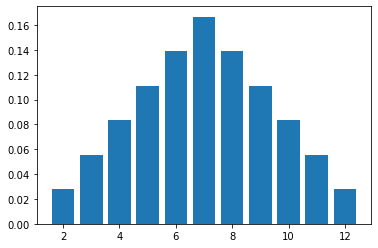

In [3]:
values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.bar(values, conv_dice)
plt.show()

#### Part 3

Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

In [4]:
avg_x = 0
for i in range (0, 11):
    avg_x += conv_dice[i]*values[i]
print(f'The average value for the sum of 2 six-sided dice is {avg_x:.2f}')

The average value for the sum of 2 six-sided dice is 7.00


In [5]:
values_squared = []
for i in range (0, 11):
    values_squared.append(values[i]*values[i])

avg_xsq = 0
for i in range (0, 11):
    avg_xsq += conv_dice[i]*values_squared[i]

var = avg_xsq - (avg_x*avg_x)
    
print(f'The variance of the sum of 2 six-sided dice is {var:.2f}')

The variance of the sum of 2 six-sided dice is 5.83


#### Part 4

Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

In [6]:
standard_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
conv_dice = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
for i in range (0, 9):
    conv_dice = np.convolve(conv_dice, standard_dice)

print(conv_dice)

[1.65381717e-08 1.65381717e-07 9.09599443e-07 3.63839777e-06
 1.18247928e-05 3.31094197e-05 8.26081676e-05 1.87542867e-04
 3.92946959e-04 7.67701930e-04 1.40951530e-03 2.44665712e-03
 4.03407353e-03 6.34189270e-03 9.53533096e-03 1.37465945e-02
 1.90415547e-02 2.53867551e-02 3.26236936e-02 4.04573294e-02
 4.84643679e-02 5.61241048e-02 6.28704385e-02 6.81581055e-02
 7.15327194e-02 7.26928060e-02 7.15327194e-02 6.81581055e-02
 6.28704385e-02 5.61241048e-02 4.84643679e-02 4.04573294e-02
 3.26236936e-02 2.53867551e-02 1.90415547e-02 1.37465945e-02
 9.53533096e-03 6.34189270e-03 4.03407353e-03 2.44665712e-03
 1.40951530e-03 7.67701930e-04 3.92946959e-04 1.87542867e-04
 8.26081676e-05 3.31094197e-05 1.18247928e-05 3.63839777e-06
 9.09599443e-07 1.65381717e-07 1.65381717e-08]


[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


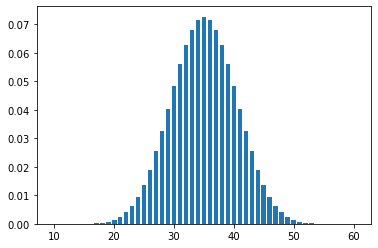

In [7]:
values_10dice = []
for i in range (10, 61):
    values_10dice.append(i)
print(values_10dice)

plt.bar(values_10dice, conv_dice)
plt.show()

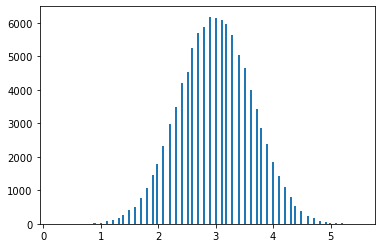

In [8]:
x = []
for i in range (0, 100000):
    sum = 0
    for j in range (0, 10):
        sum += np.random.randint(0, 7)
    x.append(sum/10)

plt.hist(x, 150)
plt.show()

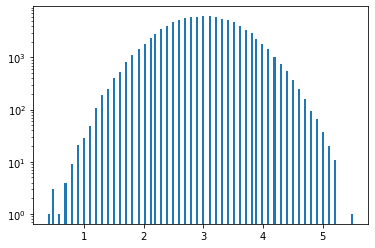

In [9]:
# Plot on semi-log graph
x = []
for i in range (0, 100000):
    sum = 0
    for j in range (0, 10):
        sum += np.random.randint(0, 7)
    x.append(sum/10)

plt.hist(x, 150)
plt.yscale('log')
plt.show()

This plot of the average of 10 dice rolls does look very close to a Gaussian, and by plotting it on a semi-log graph it confirms that the shape is approximately an upside-down parabola (except for the edges), characteristic of a Gaussian distribution.

#### Part 5

Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

The standard deviation is 0.1073.


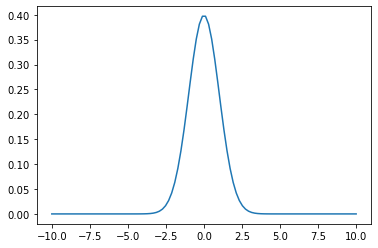

In [37]:
x = np.linspace(-10,10,100)
y = stats.norm.pdf(x)
std_y = np.std(y)

print(f'The standard deviation is {std_y:.4f}.')

plt.plot(x,y)
plt.show()

In [38]:
#Sum of 3 gaussians = convolution
conv_gauss = y
n = 1
for i in range (0, n):
    conv_gauss = np.convolve(conv_gauss, y)

#conv_gauss is probability distribution
size = len(conv_gauss)
print(size)

199


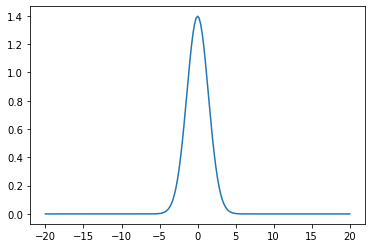

In [39]:
x_values = np.linspace(-20, 20, size)

plt.plot(x_values, conv_gauss)
plt.show()

In [40]:
# Standard deviation of this new Gaussian
std_conv = np.std(conv_gauss)
print(f'The standard deviation of the n = {n} convolutions is {std_conv:.4f}.')
ratio_std = std_conv/std_y
sqrt_n = n**0.5
print(f'The ratio of the standard deviations is {ratio_std:.4f}, and the square root of n={n} is {sqrt_n}.')

The standard deviation of the n = 1 convolutions is 0.3262.
The ratio of the standard deviations is 3.0402, and the square root of n=1 is 1.0.


The standard deviation has increased from 1 to 1.57. 